# Redukcja wymiarów danych

Bardzo często spotykanym problem w trakcie analizy danych jest ich duża wymiarowość.

Zbiór IRIS to 4 cechy + klasa, tak więc chcąc go przedstawić graficznie - powinniśmy wykreślic go w przestrzeni 4D. Zbiór breast-cancer to już 9 cech, a więc przestrzeń 9D. Oczywiście - zazwyczaj przychodzi nam pracować na jeszcze bardziej skompikowanych zbiorach.

Aby w jakikolwiek sposób przedstawić zbiór na wykresie, stosuje się szereg metod, które umożliwiają redukcję wymiarów. W jaki sposób ona działa? Metody na to pozwalające obracają układ współrzędnych, redukując przy tym wariancję każdej ze współrzędnych. Przekształcone wartości współrzędnych nazywane są ładunkami czynników.

Redukcja wymiarów może mieć kilka celów, m. in. na potrzeby prezentacji danych w przestrzeni o mniejszej liczbie wymiarów (np. 2D lub 3D, które da się reprezentować na wykresie), jako wstępna obróbka danych na potrzeby działania metod eksploracji danych lub uczenia maszynowego, metoda na przyspieszenie niektórych algorytmów uczenia maszynowego.

Warto pamiętać, że redukcja wymiarów wiąże się z koniecznością zmian danych reprezentowanych na osiach wykresu i osie nie odpowiadają już konkretnym cechom, a składowym złożonym z cech. Składowe reprezentowane na wykresie mają największy wkład co całkowitej wariancji.

W ramach zajęć omówione zostaną podstawowe metody związane z redukcją wymiarów danych, celem ich wygodnej prezentacji i przygotowania ich pod działanie metod, które opisane zostały w ramach wcześniejszych zajęć (regresja, klasyfikacja, klasteryzacja).

## Analiza głównych składowych (PCA)

Analiza głównych składowych oparta jest na macierzy korelacji lub macierzy kowariancji utworzonej ze zbioru wyjściowego. Algorytm działa dokładnie tak samo, ale daje różne wyniki. Macierz kowariancji sprawdza się w przypadku danych, które są zbliżone do siebie, a macierz korelacji, gdy wartości zmiennych nie są ze sobą porównywane (wymaga ona wstępnej normalizacji zbioru wejściowego, aby zmienne miały taką samą wariancję). PCA jest jedną z metod uczenia nienadzorowanego - ignoruje ona etykiety klas w procesie uczenia.

Algorytm PCA jest bardzo prosty. Na wejściu potrzebujemy danych zorganizowanych w macierz - kolumny reprezentują coś, a wiersze coś innego. Poniżej znajduje się lista kroków dla wersji opartej ma cierzy kowariancji (wersja dla korelacji wygląda analogicznie, ale zamiast konstruować macierz kowariancji, konstruujemy macierz korelacji)

1. Należy wyznaczyć średnie dla wierszy $ u[i] = \frac{1}{N} \sum_{n=1}^N X[i, n]$, gdzie $i$ jest indeksem wiersza, $N$ - liczbą rekordów w wierszu, a $X[i,n]$ - konkretną wartością obserwacji.
2. Budowa macierzy odchyleń (odjęcie od każdej wartości w wierszu, średniej z tego wiersza): $B[i,j] = X[i, j] - u[i]$
3. Wyznaczenie macierzy kowariancji: $C = \frac{1}{N} B \cdot B*$, gdzie $B$ jest macierzą odcyleń, a $B*$ sprzężeniem hermitowskim macierzy odchyleń (jeśli jest ona rzeczywista, to operator * jest tożsamy z transpozycją macierzy)
4. Wyznaczenie macierzy wektorów własnych $D$ dla $C$: $D = V^{-1}CV$
5. Wybór wartości własnych - wybór liczby wartości własnych, dla których wariancja jest największa, co prowadzi do redukcji wymiarów (zależnie od wyboru liczby wartości własnych) i powoduje, że wektor własny do wybranej wartości własnej jest słabiej skorelowany z pozostałymi
6. Wyznaczenie wektorów własnych do wartości własnych: $(A - \mathbb{1} \lambda) \cdot x = 0$, gdzie ... . Do rozwiązania tego układu równań liniowych można zastosować dowolną metodę np. metodę eliminacji Gaussa
7. Rzutowanie na wektory własne, aby otrzymać projekcję wyników na wektory w nowej przestrzeni, której wymiar zależny jest od wybranej liczby wartości własnych.

Mając już zrzutowany zbiór naszych danych na wektory bazowe w nowej przestrzeni - możemy przejść etapu wizualizacji danych. Oczywiście - na tym etapie można rozpocząć dalszą analizę danych i zaaplikować metody klasyfikacji, regresji czy klasteryzacji poznane w ramach wcześniejszych zajęć. Dlatego właśnie PCA jest bardzo często stosowaną metodą preprocessingu danych, której zadaniem jest minimalizacja wymiarowości.

Skorzystajmy z implementacji PCA z biblioteki sklearn, aby zobaczyć działanie metody. Jako przykład posłużą nam zdjęcia jedzenia: burgerów, napojów, makaronów i kurczaka. Zobaczymy jaki będzie efekt przedstawienia dwóch najbardziej istotnych składowych w przestrzeni 3D - czy to wystarczy, aby w dalszych krokach poprawnie zidentyfikować konkretne zdjęcia?


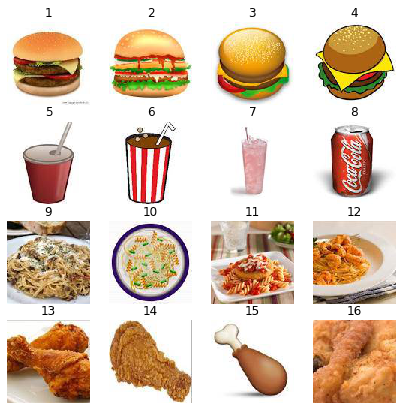

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'Dane/pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [6]:
imgData

array([[255., 255., 255., ..., 244., 244., 244.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 252., 254., ..., 185., 182., 177.],
       [254., 255., 249., ..., 255., 255., 255.],
       [255., 231., 191., ..., 198., 132.,  82.]])

### PCA - 2D

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','napój','napój','napój','napój',
                      'makaron', 'makaron', 'makaron', 'makaron', 'kurczak', 'kurczak', 'kurczak', 'kurczak']
projected

,pc1,pc2,food
1,-1576.718012,6641.161865,burger
2,-493.843128,6396.576256,burger
3,990.115918,7236.341098,burger
4,2189.885837,9051.090458,burger
5,-7843.058644,-1061.291235,napój
6,-8498.430337,-5438.421618,napój
7,-11181.811523,-5320.339202,napój
8,-6851.918279,1124.771938,napój
9,7635.123740,-5044.112396,makaron
10,-708.066499,-528.623055,makaron


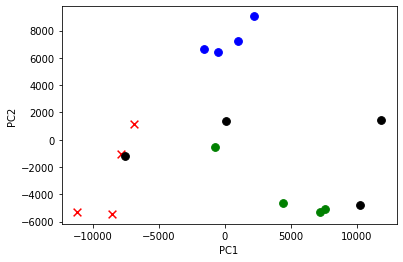

In [8]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'napój':'r', 'makaron':'g', 'kurczak':'k'}
markerTypes = {'burger':'o', 'napój':'x', 'makaron':'o', 'kurczak':'o'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])
    plt.xlabel("PC1")
    plt.ylabel("PC2")

Jak łatwo zaważyć - redukcja wymiarowości od razu dała efekt, który jest zauważalny. Po pierwsze - udało nam się zaprezentować grafikę na wykresie - wcześniej była to jedynie tablica mająca 36963 cechy (każdy obraz miał rozdzielczość 111 x 111, a każdy jego pixel reprezentowany był przez 3 kolory palety RGB. Pod drugie widać świetną separację burgerów, makaronów i napojów. Problem sprawiają jedynie kurczaki, które są podobne do wszystkiego, z wyjątkiem burgerów. Dlaczego tak jest? Wystarczy spojrzeć na zdjęcia - kształty kurczaków są podobne do puszek/szklanek z napojami (podłużny kształt węższy z jednej strony), a ich kolory podobne do makaronów. 

Należy pamiętać jeszcze, że był to przykład mający na celu pokazanie jak działa PCA na potrzeby redukcji wymiarowości. W prawdziwym podejściu do danych - zbiór wejściowy należałoby podzielić na dane uczące i kontrolne i sprawdzić jak wygląda projekcja danych ze zbioru kontrolnego na wektory bazowe wyznaczone na podstawie danych ze zbioru treningowego.

Spójrzmy jeszcze na wariancję dla tych dwóch składowych, które zostały wykorzystane jako wektory bazowe, na które wykonywaliśmy projekcję danych.

In [9]:
print("Procentowy wkład pierwszej składowej do całkowitej wariancji: " + str(np.array(pca.explained_variance_ratio_)[0] * 100))
print("Procentowy wkład drugiej składowej do całkowitej wariancji: " + str(np.array(pca.explained_variance_ratio_)[1] * 100))
print("Łączny procentowy wkład obu składowych do całkowitej wariancji: " + str(np.sum(np.array(pca.explained_variance_ratio_))*100))

Procentowy wkład pierwszej składowej do całkowitej wariancji: 27.799591609245233
Procentowy wkład drugiej składowej do całkowitej wariancji: 14.262318020556345
Łączny procentowy wkład obu składowych do całkowitej wariancji: 42.061909629801576


Pomimo małego udziału składowych w całkowitym bilansie wariancji (chociaż zwrócić należy uwagę, że dokonaliśmy drastycznej redukcji wymiarów - z prawie 40 000 do 2) - alorytmy klasyfikacji i klasteryzacji powinny poradzić sobie z w miarę poprawnym podziałem przestrzeni.

### PCA - 3D

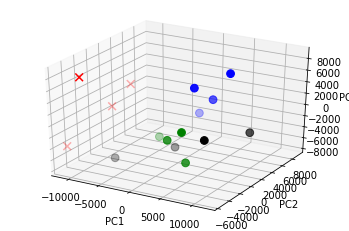

In [10]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 3
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2', 'pc3'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','napój','napój','napój','napój',
                      'makaron', 'makaron', 'makaron', 'makaron', 'kurczak', 'kurczak', 'kurczak', 'kurczak']

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

colors = {'burger':'b', 'napój':'r', 'makaron':'g', 'kurczak':'k'}
markerTypes = {'burger':'o', 'napój':'x', 'makaron':'o', 'kurczak':'o'}

fig = plt.figure()
ax = plt.axes(projection='3d')

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    ax.scatter3D(d['pc1'],d['pc2'], d['pc3'], c=colors[foodType],s=60,marker=markerTypes[foodType])
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

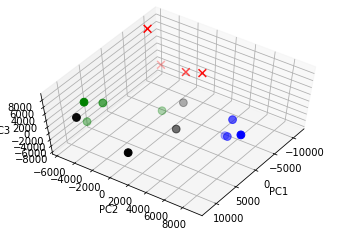

In [11]:
ax.view_init(60, 35)
fig

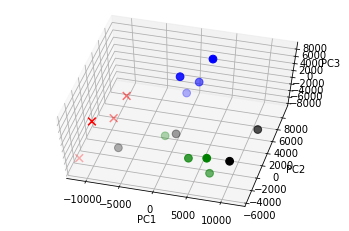

In [12]:
ax.view_init(60, -75)
fig

In [13]:
import time
from IPython.display import clear_output

for angle in range(0, 360):
    #clear_output(wait=True)
    ax.view_init(30, angle)
    fig

Wykresem 3D można obracać, celem obejrzenia danych z każdej strony. Na potrzeby tej wizualizacji można również spróbować zrobić animację, która pozwoli nam spojrzeć na dane z każdej strony z osobna.

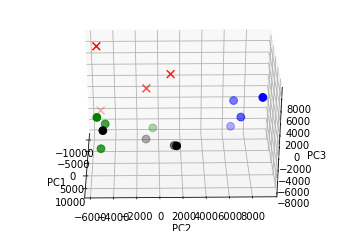

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


for angle in range(360):
    clear_output(wait=True)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for foodType in markerTypes:
        d = projected[projected['food']==foodType]
        ax.scatter3D(d['pc1'],d['pc2'], d['pc3'], c=colors[foodType],s=60,marker=markerTypes[foodType])
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
    ax.view_init(30, angle)
    plt.show()
    time.sleep(0.01)

In [15]:
print("Procentowy wkład pierwszej składowej do całkowitej wariancji: " + str(np.array(pca.explained_variance_ratio_)[0] * 100))
print("Procentowy wkład drugiej składowej do całkowitej wariancji: " + str(np.array(pca.explained_variance_ratio_)[1] * 100))
print("Procentowy wkład trzeciej składowej do całkowitej wariancji: " + str(np.array(pca.explained_variance_ratio_)[2] * 100))
print("Łączny procentowy wkład obu składowych do całkowitej wariancji: " + str(np.sum(np.array(pca.explained_variance_ratio_))*100))

Procentowy wkład pierwszej składowej do całkowitej wariancji: 27.79959161237693
Procentowy wkład drugiej składowej do całkowitej wariancji: 14.262319380253766
Procentowy wkład trzeciej składowej do całkowitej wariancji: 9.090190534071615
Łączny procentowy wkład obu składowych do całkowitej wariancji: 51.15210152670231


Jak widać - dodanie jednej skłądowej spowodowało wzrost prezentowanej wariancji o niewiele ponad 9%. W dalszym ciągu widać, że może pojawić się problem z klasyfikacją lub klasteryzacją w przypadku pracy na tych danych.

## Liniowa analiza dyskryminacyjna (LDA)

Zadaniem LDA jest znalezienie takiej podprzestrzeni cech, w której klasy są od siebie bardzo dobrze rozdzielone - makrymalizowana jest więc separowalność klas. Dodatkowo LDA zakłada, że klasy podążają za rozkładem normalnym oraz kowariancje w każdej z klas są takie same. Wymusza to na nas oczywiście wstępną normalizację danych przed przystąpieniem do właściwej procedury. Dodatkowo - LDA wymaga etykiet danych, na których będzie się uczyć.

Znalezione przez LDA podprzestrzenie cech wykorzystywane są jako klasyfikator liniowy lub nowe wektory bazowe służące do redukcji wymiarowości problemu.

LDA jest bardzo często wykorzystywaną metodą w rozpoznawaniu twarzy. Jest to spowodowane mechanizmem jej działania - duże obrazy (wielowymiarowe dane) są redukowane do mniejszej liczby wymiarów, które łatwiej jest poddać klasyfikacji. Obrazy twarzy po redykcji nazywa się często Fisher faces, ze względy na związany z LDA liniowy dyskryminator Fishera (FLD).

Sprawdźmy jak LDA działa na tych samych danych, na których testowaliśmy PCA.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
projected = lda.fit(imgData, projected['food']).transform(imgData)
projected = pd.DataFrame(projected,columns=['c1','c2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','napój','napój','napój','napój',
                      'makaron', 'makaron', 'makaron', 'makaron', 'kurczak', 'kurczak', 'kurczak', 'kurczak']

projected


,c1,c2,food
1,0.991853,0.533661,burger
2,-0.419243,1.483766,burger
3,-0.811373,0.623460,burger
4,-0.289812,1.390772,burger
5,1.779212,0.595995,napój
6,2.871848,-1.090264,napój
7,0.976840,-1.578800,napój
8,1.845205,0.988477,napój
9,-1.612101,-1.642391,makaron
10,-0.329639,-0.355583,makaron


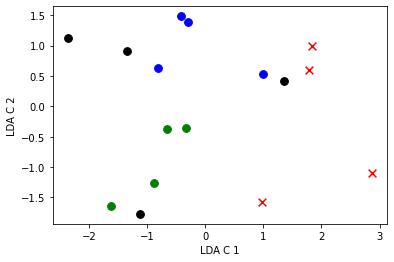

In [17]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'napój':'r', 'makaron':'g', 'kurczak':'k'}
markerTypes = {'burger':'o', 'napój':'x', 'makaron':'o', 'kurczak':'o'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['c1'],d['c2'],c=colors[foodType],s=60,marker=markerTypes[foodType])
    plt.xlabel("LDA C 1")
    plt.ylabel("LDA C 2")

Jak widać na powyższym wykresie - redukcja wyimarów z wykorztstaniem LDA nie prowadzi w tym przypadku do tak wyraźnej separacji danych, jak miało to miejsce w przypadku PCA. Problem w dalszym ciągu stanowią zdjęcia kurczaka, które mieszają się z resztą danych. Pamiętać należy, że LDA używa etykietowania, a algorytm stara się jak najbardziej odseparować od siebie grupy danych. Dlatego w tym przypadku można by było zastosować jeszcze inne podejście, ale miałoby ono uzasadnienie, gdyby zbiór wejściowy był większy. Zbiór ten mógłby zostać podzielony na dwie grupy - zbiór treningowy i zbiór kontrolny. Na zbiorze treningowym nauczylibyśmy naszzą metodę separacji na podstawie cech, a następnie sprawdzilibyśmy jak dane ze zbioru kontrolnego są grupowane na wykresie.  
 
Oczywiście - następnie można by było poddać dane dalszej obróbce, korzystając z innych algorytmów.

## MDS - skalowanie wielowymiarowe

Kolejną metodą wykorzystywaną przy redukcji wymiarów jest skalowaie wielowymiarowe (MDS). Zadaniem algorytmu jest przekształcenie zbioru danych tak, aby wynikowy zbiór posiadał mniej wymiarów, ale zachowane były euklidesowe odległości między punktami. Dzięki tej cesze - MDS jest polecaną metodą redukcji wymiarów, jeśli później chce się na nich wykonać na przykład klasteryzację. 

Bardzo waże jest, że dla poprawności działania algorytmu, dane muszę być znormalizowane lub ustandaryzowane (dokładnie jak w przypadku chociażby algorytmu k-średnich). 

Sprawdźmy działanie skalowania wielowymiarowego zaimplementowanego w bibliotece sklearn w języku python. MDS zaimplementowany jest w module manifold.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(2, random_state=0)
projected = mds.fit_transform(imgData, projected['food'])
projected = pd.DataFrame(projected,columns=['c1','c2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','napój','napój','napój','napój',
                      'makaron', 'makaron', 'makaron', 'makaron', 'kurczak', 'kurczak', 'kurczak', 'kurczak']

projected


,c1,c2,food
1,1037.149882,8825.892207,burger
2,-388.361914,1447.193864,burger
3,3595.383127,3857.996025,burger
4,6523.389837,12369.407841,burger
5,-10676.619409,-3323.138152,napój
6,-12553.676073,11046.871995,napój
7,-15910.700529,-569.708844,napój
8,-5542.898598,10798.175760,napój
9,252.665169,-15145.831890,makaron
10,-6505.348064,-9560.097122,makaron


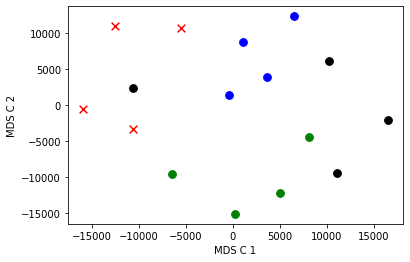

In [21]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'napój':'r', 'makaron':'g', 'kurczak':'k'}
markerTypes = {'burger':'o', 'napój':'x', 'makaron':'o', 'kurczak':'o'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['c1'],d['c2'],c=colors[foodType],s=60,marker=markerTypes[foodType])
    plt.xlabel("MDS C 1")
    plt.ylabel("MDS C 2")

Powyższy wykres pokazuje, że MDS też całkiem nieźle poradził sobie z rozdzieleniem obrazów i przygotowaniem danych pod poddanie ich dalszej obróbce. W dalszym ciągu problemem pozostają zdjęcia przedstawiające kurczaka. Wynika to oczywiście z ich (zamierzonego) podobieństwa do każdej z grup, z których składają się dane. Oczywiście - pozostaje jeszcze kwestia standaryzacji danych, która tutaj nie została przeprowadzona. Oczywiście - dane są w pewnym sensie znormalizowane (taka sama rozdzielczość, paleta RGB etc.),  ale spróbować można jeszcze jednego rozwiązania - przepuścić dane wejściowe przez dowolny skaler zintegrowany w bibliotece sklearn. Spróbujmy zrobić to z wykorzystaniem skalera MinMax, który działa następująco:

$$ X_{i\ std} = \frac{X_i - min(X)}{max(X) - min(X)}, $$

$$ X_{scaled} = X_{std} * (max(X) - min(X)) + min(X), $$

gdzie $X$ jest wektorem wartości, a $X_i$ jego $i$-tym elementem.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
imgData_scaled = scaler.fit_transform(imgData)

mds = MDS(2, random_state=0)
projected = mds.fit_transform(imgData_scaled, projected['food'])
projected = pd.DataFrame(projected,columns=['c1','c2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','napój','napój','napój','napój',
                      'makaron', 'makaron', 'makaron', 'makaron', 'kurczak', 'kurczak', 'kurczak', 'kurczak']

projected

,c1,c2,food
1,29.461916,-11.708738,burger
2,49.952485,-8.966316,burger
3,29.317514,12.665911,burger
4,60.902122,17.473635,burger
5,7.577648,-47.059065,napój
6,9.002489,-77.521394,napój
7,-35.624299,-61.778907,napój
8,39.650266,-46.700099,napój
9,-27.255101,71.195750,makaron
10,-54.958171,-16.294723,makaron


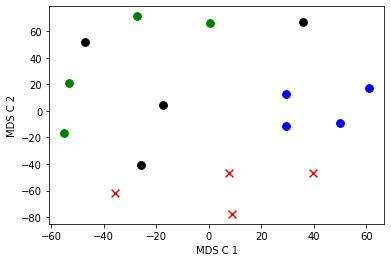

In [24]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'napój':'r', 'makaron':'g', 'kurczak':'k'}
markerTypes = {'burger':'o', 'napój':'x', 'makaron':'o', 'kurczak':'o'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['c1'],d['c2'],c=colors[foodType],s=60,marker=markerTypes[foodType])
    plt.xlabel("MDS C 1")
    plt.ylabel("MDS C 2")

Oba wykresy dla redukcji wymiarów z wykorzystaniem MDS różnią się od siebie zarówno wizualnie, jak i wartościami na osiach. Jak widać - standaryzacja danych wejściowych niewiele pomogła i w dalszym ciągu obrazy przedstawiające kurczaka mieszają się z resztą grafik. Bez nich - algorytmy klasyfikacji lub klasteryzacji powinny poradzić sobie z dalszą analizą danych.

Przedstawione tutaj metody redukcji wymiarowości danych nie są jedynymi, które stosuje się w analizie danych. Oczywiście - są to jedne z prostszych metod, które zazwyczaj dają pożądany rezultat. W przypadku naszych zajęć - są to postawowe metody, które są bardzo popularne i łatwe w implementacji.

## Praca domowa

Wykonaj redukcję wymiarów (do $n=2$ i $n=3$) dla zbioru IRIS a wyniki przedstaw w postaci wykresów. Zadbaj o to, aby każda z klas oznaczona była na wykresach innym kolorem - na tej podstawie stwierdzisz, czy redukcja wymiarów była efektywna. Skorzystaj z trzech omawianych w ramach zajęć metod: PCA, LDA oraz MDS.

Dodatkowo - dla jednej z wybranych metod - podziel zbiór IRIS na dane uczące i dane testowe, wykonaj redukcję wymiarów na zbiorze uczącym a następnie wykonaj rzutowanie danych ze zbioru testowego na wektory bazowe określone na podstawie danych uczących. Pamiętaj, aby zadbać o to, aby zbiór uczący był odpowiednio duży (albo odpowiednio mały) oraz aby zawierał przedstawicieli każdej z klas w mniej-więcej tej samej proporcji.

Pamiętaj również, że część z z algorytmów potrzebuje danych unormowanych/standaryzowanych, a zbiór IRIS nie jest zbiorem danych unormowanych.

